### Possible process flow of sentiment analysis

1. Select sources to gather data (News websites, Netflix financial reports)
2. Scrape sources
3. Use NLP to tokenize and summarize data
4. Put summary into AI for sentiment analysis (OpenAI, HuggingFaces); use Ensembling approach
5. Make a conclusion about sentiment analysis

### Platforms and tools for sentiment analysis

##### Google Cloud
Cheap, works good
https://cloud.google.com/natural-language/docs/analyzing-sentiment

##### OpenAI API
Cheap, Chatgpt-3 works good, chatgpt-4 requires invitation
<br>
Chatgpt can be fine-tuned
<br>
4096 Tokens per total (limit) - concerning input + output

##### TextBlob python library
Free, works correct enough

### Optional

##### IBM API
https://cloud.ibm.com/docs/natural-language-understanding?topic=natural-language-understanding-sentiment-analysis

##### Bloomberg API
Free period is limited, can be expensive (ask Bayes staff)

##### Stocktwits not working

In [5]:
# retrieve text from PDF
from tqdm.notebook import tqdm
from PyPDF2 import PdfReader
from tqdm.notebook import tqdm
from textblob import TextBlob
import numpy as np
import credentials

### Perform sentiment analysis on Netflix report

In [5]:
# check the total number of tokens in prompt
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

# num_tokens_from_string(prompt, "cl100k_base") clk100k_base is the encoding used by GPT-3

In [41]:
prompt = """

Consolidated revenues for the year ended December 31, 2022 increased 6% as compared to the year ended December 31, 2021, due to
the 6% growth in average paying memberships and a 1% increase in average monthly revenue per paying membership. The increase in
average monthly revenue per paying membership resulted from our price changes, partially offset by the strengthening of the U.S. dollar relative
to certain foreign currencies.
The decrease in operating margin is primarily due to revenues growing at a slower rate as compared to the 15% increase in content
amortization. Revenue growth during the year was impacted by fluctuations in foreign exchange rates, while content amortization increased as a
result of delays in content releases due to the COVID-19 pandemic impacting the comparable prior year period.
Cash, cash equivalents, restricted cash and short-term investments increased $27 million in the year ended December 31, 2022 primarily
due to cash provided by operations, partially offset by acquisitions, the repayment of debt and purchases of property and equipment.
Debt, net of debt issuance costs, decreased $1,040 million primarily due to the repayment upon maturity of the $700 million aggregate
principal amount of our 5.500% Senior Notes in February 2022, coupled with the remeasurement of our euro-denominated notes. The amount of
principal and interest due in the next twelve months is $682 million. The amount of principal and interest due beyond the next twelve months is
$17,529 million. As of December 31, 2022, no amounts had been borrowed under our $1 billion Revolving Credit Agreement. See Note 6 Debt in
the accompanying notes to our consolidated financial statements.
We anticipate that our future capital needs from the debt market will be more limited compared to prior years. Our ability to obtain this or
any additional financing that we may choose to, or need to, obtain will depend on, among other things, our development efforts, business plans,
operating performance and the condition of the capital markets at the time we seek financing. We may not be able to obtain such financing on
terms acceptable to us or at all. If we raise additional funds through the issuance of equity or debt securities, those securities may have rights,
preferences or privileges senior to the rights of our common stock, and our stockholders may experience dilution.
In March 2021, our Board of Directors authorized the repurchase of up to $5 billion of our common stock, with no expiration date. Stock
repurchases may be effected through open market repurchases in compliance with Rule 10b-18 under the Exchange Act, including through the
use of trading plans intended to qualify under Rule 10b5-1 under the Exchange Act, privately-negotiated transactions, accelerated stock
repurchase plans, block purchases, or other similar purchase techniques and in such amounts as management deems appropriate. We are not
obligated to repurchase any specific number of shares, and the timing and actual number of shares repurchased will depend on a variety of
factors, including our stock price, general economic, business and market conditions, and alternative investment opportunities. We may
discontinue any repurchases of our common stock at any time without prior notice. As of December 31, 2022, the Company has repurchased
1,182,410 shares of common stock for an aggregate amount of $600 million. As of December 31, 2022, $4.4 billion remains available for
repurchases.
Our primary uses of cash include the acquisition, licensing and production of content, marketing programs, streaming delivery and
personnel-related costs, as well as for strategic acquisitions and investments. Cash payment terms for non-original content have historically
been in line with the amortization period. Investments in original content, and in particular content that we produce and own, require more cash
upfront relative to licensed content. For example, production costs are paid as the content is created, well in advance of when the content is
available on the service and amortized. We expect to continue to significantly invest in global content, particularly in original content, which will
impact our liquidity. We currently anticipate that cash flows from operations, available funds and access to financing sources, including our
revolving credit facility, will continue to be sufficient to meet our cash needs for the next twelve months and beyond.
Net cash provided by operating activities increased $1,634 million from the year ended December 31, 2021 to $2,026 million for the year
ended December 31, 2022 primarily driven by a $1,918 million or 6% increase in revenues, coupled with a decrease in cash payments for
content assets. The payments for content assets decreased $810 million, from $17,469 million to $16,660 million, or 5%, as compared to the
increase in the amortization of content assets of $1,796 million, from $12,230 million to $14,026 million, or 15%. In addition, we had increased
payments associated with higher operating expenses, primarily related to increased personnel costs to support our continued improvements in
our streaming service and our international expansion.
Net cash used in investing activities increased $737 million, primarily due to purchases of short-term investments.
Net cash used in financing activities decreased $486 million primarily due to there being no repurchases of common stock in the year
ended December 31, 2022 as compared to repurchases of common stock for an aggregate amount of $600 million in the year ended
December 31, 2021, partially offset by the repayment upon maturity of the $700 million aggregate principal amount of our 5.500% Senior Notes
in February 2022 as compared to the repayment upon maturity of the $500 million aggregate principal amount of our 5.375% Senior Notes in
February 2021.
Free cash flow was $2,873 million lower than net income for the year ended December 31, 2022 primarily due to $2,634 million of cash
payments for content assets over amortization expense, $353 million of non-cash remeasurement gain on our euro-denominated debt, and
$461 million other non-favorable working capital differences, partially offset by $575 million of non-cash stock-based compensation expenses.
Free cash flow was $5,275 million lower than net income for the year ended December 31, 2021 primarily due to $5,239 million of cash
payments for content assets over amortization expense, $431 million of non-cash remeasurement gain on our euro-denominated debt and
$8 million other non-favorable working capital differences, partially offset by $403 million of non-cash stock-based compensation expenses.
The remaining
deferred revenue balance, which is related to gift cards and other prepaid memberships, will be recognized as revenue over the period of service
after redemption, which is expected to occur over the next 12 months. The $56 million increase in deferred revenue as compared to the balance
of $1,209 million for the year ended December 31, 2021, is a result of the increase in membership fees billed due to increased memberships and
acquisition-related deferred revenue.
As of December 31, 2022, approximately $5,428 million, $2,853 million, and $1,984 million of the $12,733 million unamortized cost of the
licensed content is expected to be amortized in each of the next three years. As of December 31, 2022, approximately $3,565 million, $2,310
million, and $1,601 million of the $9,111 million unamortized cost of the produced content that has been released is expected to be amortized in
each of the next three years.
"""

In [52]:
prompt = """
2020 was an incredibly difficult year with extraordinary loss for so many families, new restrictions that
none of us have ever had to live with before and great uncertainty. We’re enormously grateful that in
these uniquely challenging times we’ve been able to provide our members around the world with a
source of escape, connection and joy while continuing to build our business. With 8.5m paid net
additions in Q4, we crossed the 200m paid memberships mark. For the full year, we added a record 37m
paid memberships, achieved $25 billion in annual revenue (+24% year over year) and grew operating
profit 76% to $4.6 billion
Average paid streaming memberships increased 23% year over year in Q4, while average revenue per
membership1 was flat year over year both on a reported and foreign exchange (F/X) neutral basis.
Revenue was 1% higher than our guidance forecast, as paid net adds exceeded our 6.0m projection by
2.5m. Operating margin of 14.4% (a 600bps increase from Q4’19) also came in above our guidance, due
to higher-than-expected revenue. EPS of $1.19 vs. $1.30 a year ago included a $258m non-cash
unrealized loss from F/X remeasurement on our Euro denominated debt.
For the full year, our 37m paid net additions represented a 31% increase from 2019’s 28m paid net adds.
We’re becoming an increasingly global service with 83% of our paid net adds in 2020 coming from outside the UCAN region. Our EMEA region accounted for 41% of our full year paid net adds, while APAC
was the second largest contributor to paid net additions with 9.3m (up 65% year over year).
As a reminder, the quarterly guidance we provide is our actual internal forecast at the time we report
and we strive for accuracy. For Q1’21, we expect paid net adds of 6.0m vs. last Q1’s 15.8m, which
included the impact from the initial COVID-19 lockdowns. Since the start of 2018, our paid memberships
have risen from 111m to 204m and our average revenue per membership has grown from $9.88 to
$11.02, despite significant F/X headwinds. This approach has allowed us to organically increase revenue
by $4-$5 billion annually over the past several years.
We’ve made good progress growing our profitability with FY20 operating margin of 18% rising five
percentage points over prior year. For FY21, we’re now targeting a 20% operating margin, up two
percentage points from 2020 and higher than our previous 19% forecast, due to a more favorable
revenue outlook. As we said last quarter, we intend to continue to grow our operating margin each year
at an average rate of three percentage points per year over any few-year period, but we anticipate some
lumpiness. Some years we’ll be a little over (like in 2020), some years a little under (like in 2021), but we
are trying to keep on an average three percentage points per year long-term trajectory.
The big growth in streaming entertainment has led legacy competitors like Disney, WarnerMedia and
Discovery to compete with us in new ways, which we’ve been expecting for many years. This is, in part,
why we have been moving so quickly to grow and further strengthen our original content library across a
wide range of genres and nations. Our fourth quarter slate highlights the breadth and diversity of our
entertainment offering.
In scripted English language television, season four of the critically acclaimed ​The Crown​ was the biggest
season so far and drove new watchers of prior seasons. In its first 28 days, more member households
chose to watch season four of ​The Crown ​than each of the prior seasons, helping to grow the number of
member households that have chosen to watch this series to over 100m since its initial launch. In late
December, we released our first original series from Shonda Rhimes, ​Bridgerton.​ This title has proven
immensely popular and we’ll have some exciting news about ​Bridgerton​ later this week.
Our largest original film of the quarter was ​The Midnight Sky, ​ starring and directed by George Clooney;
we estimate 72m member households will choose to watch this title in its first four weeks. In its first 28
days, 43m member households chose to watch our animated feature film ​Over the Moon​ (directed by
legendary creator Glen Keane) with high levels of rewatching. ​We Can Be Heroes​ (directed by Robert
Rodriguez) was another successful family film with a projected 53m member households choosing this
title in its first four weeks.
Our holiday movie slate also resonated with our members; in the first four weeks, 68m and 61m
member households chose to watch ​Holidate​ (starring Emma Roberts) and ​The Christmas Chronicles:
Part Two ​(starring Kurt Russell), respectively. Our first Portuguese language holiday film from Brazil, ​Just
Another Christmas​ (starring Leandro Hassum)​,​ was also a big hit with 26m member households globally
choosing to watch in the first 28 days of release.
We continue to ramp up our local original content slate. Our top local titles this quarter include
Barbarians ​(a historical action series from Germany that 37m member households globally chose to
watch in the first four weeks), ​Sweet Home​, our Korean language horror show (22m member
households), ​Selena: The Series​, which particularly resonated with members throughout Mexico and the
US (25m member households globally), and ​Alice in Borderland​, a sci-fi thriller from Japan (18m member
households). While designed to be very impactful in the home country, we see many cases of our local
originals traveling more broadly. For example, ​Lupin, ​ an adrenalin-filled French language heist series
released in early January, has hit #2 in our US Top 10 list and ranked #1 in dozens of other countries
including Brazil, Argentina, Germany, Italy, Spain, Poland, Vietnam, the Philippines and many more. We
project 70m member households will choose to watch ​Lupin​ in its first 28 days of release.
In addition to titles with big viewership, we also aspire to have hits that become part of the cultural
zeitgeist. In 2020 alone, we had ​Tiger King, ​ ​Bridgerton​ and ​The Queen’s Gambit​. Not only did 62m
member households choose to watch ​The Queen’s Gambit​ in its first 28 days (making this show our
biggest limited series in Netflix history), but it ignited​ sales of chess sets​ and inspired the next generation
of chess prodigies. In fact, Netflix series accounted for nine out of the 10 most searched shows globally
in 2020, while our films represented two of the top 10.
Our productions are back up and running in most regions - we have learned that flexibility and
adaptability are paramount in this fast-changing environment. With over 500 titles currently in post
production or preparing to launch on our service and plans to release at least ​one new original film
every week in 2021​ with extraordinary talent, we’re confident we’ll continue to have a great content
offering for our members.
In Q1, in addition to the recently released season 3 of ​Cobra Kai ​and​ Lupin​, we’re excited to be launching
later this quarter ​To All the Boys I’ve Loved Before 3, ​ the finale to this beloved rom com trilogy, our
young adult drama ​Fate: The Winx Saga, ​ ​Yes Day​ (a family movie starring Jennifer Garner), ​Sky Rojo, ​ a
thrilling new series from the creators of ​La Casa de Papel​ (aka ​Money Heist​) and ​Space Sweepers​, an
action packed Korean sci-fi film.
Net cash generated by operating activities in Q4 was -$138 million vs. -$1.5 billion in the prior year
period. Free cash flow2 (FCF) for the quarter was -$284 million vs. -$1.7 billion in Q4‘19, bringing full year
2020 free cash flow to +$1.9 billion vs. -$3.3 billion in 2019.
We believe we are very close to being sustainably FCF positive. For the full year 2021, we currently
anticipate free cash flow will be around break even (vs. our prior expectation for -$1 billion to break
even). Combined with our $8.2 billion cash balance and our $750m undrawn credit facility, ​we believe
we​ ​no longer have a need to raise external financing for our day-to-day operations.​ Our 5.375%
February 1, 2021 bonds mature in Q1. We plan on repaying the bond at maturity out of cash on hand, as
we are currently well above our minimum cash needs.
As we generate excess cash, we intend to maintain $10B-15B in gross debt and will explore returning
cash to shareholders through ongoing stock buybacks, as we did in the past (2007-2011).
"""

In [58]:
prompt1 = """
2020 was an incredibly difficult year with extraordinary loss for so many families, new restrictions that
none of us have ever had to live with before and great uncertainty. We’re enormously grateful that in
these uniquely challenging times we’ve been able to provide our members around the world with a
source of escape, connection and joy while continuing to build our business. With 8.5m paid net
additions in Q4, we crossed the 200m paid memberships mark. For the full year, we added a record 37m
paid memberships, achieved $25 billion in annual revenue (+24% year over year) and grew operating
profit 76% to $4.6 billion
Average paid streaming memberships increased 23% year over year in Q4, while average revenue per
membership1 was flat year over year both on a reported and foreign exchange (F/X) neutral basis.
Revenue was 1% higher than our guidance forecast, as paid net adds exceeded our 6.0m projection by
2.5m. Operating margin of 14.4% (a 600bps increase from Q4’19) also came in above our guidance, due
to higher-than-expected revenue. EPS of $1.19 vs. $1.30 a year ago included a $258m non-cash
unrealized loss from F/X remeasurement on our Euro denominated debt.
For the full year, our 37m paid net additions represented a 31% increase from 2019’s 28m paid net adds.
We’re becoming an increasingly global service with 83% of our paid net adds in 2020 coming from outside the UCAN region. Our EMEA region accounted for 41% of our full year paid net adds, while APAC
was the second largest contributor to paid net additions with 9.3m (up 65% year over year).
As a reminder, the quarterly guidance we provide is our actual internal forecast at the time we report
and we strive for accuracy. For Q1’21, we expect paid net adds of 6.0m vs. last Q1’s 15.8m, which
included the impact from the initial COVID-19 lockdowns. Since the start of 2018, our paid memberships
have risen from 111m to 204m and our average revenue per membership has grown from $9.88 to
$11.02, despite significant F/X headwinds. This approach has allowed us to organically increase revenue
by $4-$5 billion annually over the past several years.
We’ve made good progress growing our profitability with FY20 operating margin of 18% rising five
percentage points over prior year. For FY21, we’re now targeting a 20% operating margin, up two
percentage points from 2020 and higher than our previous 19% forecast, due to a more favorable
revenue outlook. As we said last quarter, we intend to continue to grow our operating margin each year
at an average rate of three percentage points per year over any few-year period, but we anticipate some
lumpiness. Some years we’ll be a little over (like in 2020), some years a little under (like in 2021), but we
are trying to keep on an average three percentage points per year long-term trajectory.
The big growth in streaming entertainment has led legacy competitors like Disney, WarnerMedia and
Discovery to compete with us in new ways, which we’ve been expecting for many years. This is, in part,
why we have been moving so quickly to grow and further strengthen our original content library across a
wide range of genres and nations. Our fourth quarter slate highlights the breadth and diversity of our
entertainment offering."""

In [56]:
prompt2 = """
In scripted English language television, season four of the critically acclaimed ​The Crown​ was the biggest
season so far and drove new watchers of prior seasons. In its first 28 days, more member households
chose to watch season four of ​The Crown ​than each of the prior seasons, helping to grow the number of
member households that have chosen to watch this series to over 100m since its initial launch. In late
December, we released our first original series from Shonda Rhimes, ​Bridgerton.​ This title has proven
immensely popular and we’ll have some exciting news about ​Bridgerton​ later this week.
Our largest original film of the quarter was ​The Midnight Sky, ​ starring and directed by George Clooney;
we estimate 72m member households will choose to watch this title in its first four weeks. In its first 28
days, 43m member households chose to watch our animated feature film ​Over the Moon​ (directed by
legendary creator Glen Keane) with high levels of rewatching. ​We Can Be Heroes​ (directed by Robert
Rodriguez) was another successful family film with a projected 53m member households choosing this
title in its first four weeks.
Our holiday movie slate also resonated with our members; in the first four weeks, 68m and 61m
member households chose to watch ​Holidate​ (starring Emma Roberts) and ​The Christmas Chronicles:
Part Two ​(starring Kurt Russell), respectively. Our first Portuguese language holiday film from Brazil, ​Just
Another Christmas​ (starring Leandro Hassum)​,​ was also a big hit with 26m member households globally
choosing to watch in the first 28 days of release.
We continue to ramp up our local original content slate. Our top local titles this quarter include
Barbarians ​(a historical action series from Germany that 37m member households globally chose to
watch in the first four weeks), ​Sweet Home​, our Korean language horror show (22m member
households), ​Selena: The Series​, which particularly resonated with members throughout Mexico and the
US (25m member households globally), and ​Alice in Borderland​, a sci-fi thriller from Japan (18m member
households). While designed to be very impactful in the home country, we see many cases of our local
originals traveling more broadly. For example, ​Lupin, ​ an adrenalin-filled French language heist series
released in early January, has hit #2 in our US Top 10 list and ranked #1 in dozens of other countries
including Brazil, Argentina, Germany, Italy, Spain, Poland, Vietnam, the Philippines and many more. We
project 70m member households will choose to watch ​Lupin​ in its first 28 days of release.
In addition to titles with big viewership, we also aspire to have hits that become part of the cultural
zeitgeist. In 2020 alone, we had ​Tiger King, ​ ​Bridgerton​ and ​The Queen’s Gambit​. Not only did 62m
member households choose to watch ​The Queen’s Gambit​ in its first 28 days (making this show our
biggest limited series in Netflix history), but it ignited​ sales of chess sets​ and inspired the next generation
of chess prodigies. In fact, Netflix series accounted for nine out of the 10 most searched shows globally
in 2020, while our films represented two of the top 10."""

In [2]:
prompt3 = """Our productions are back up and running in most regions - we have learned that flexibility and
adaptability are paramount in this fast-changing environment. With over 500 titles currently in post
production or preparing to launch on our service and plans to release at least ​one new original film
every week in 2021​ with extraordinary talent, we’re confident we’ll continue to have a great content
offering for our members.
In Q1, in addition to the recently released season 3 of ​Cobra Kai ​and​ Lupin​, we’re excited to be launching
later this quarter ​To All the Boys I’ve Loved Before 3, ​ the finale to this beloved rom com trilogy, our
young adult drama ​Fate: The Winx Saga, ​ ​Yes Day​ (a family movie starring Jennifer Garner), ​Sky Rojo, ​ a
thrilling new series from the creators of ​La Casa de Papel​ (aka ​Money Heist​) and ​Space Sweepers​, an
action packed Korean sci-fi film.
Net cash generated by operating activities in Q4 was -$138 million vs. -$1.5 billion in the prior year
period. Free cash flow2 (FCF) for the quarter was -$284 million vs. -$1.7 billion in Q4‘19, bringing full year
2020 free cash flow to +$1.9 billion vs. -$3.3 billion in 2019.
We believe we are very close to being sustainably FCF positive. For the full year 2021, we currently
anticipate free cash flow will be around break even (vs. our prior expectation for -$1 billion to break
even). Combined with our $8.2 billion cash balance and our $750m undrawn credit facility, ​we believe
we​ ​no longer have a need to raise external financing for our day-to-day operations.​ Our 5.375%
February 1, 2021 bonds mature in Q1. We plan on repaying the bond at maturity out of cash on hand, as
we are currently well above our minimum cash needs.
As we generate excess cash, we intend to maintain $10B-15B in gross debt and will explore returning
cash to shareholders through ongoing stock buybacks, as we did in the past (2007-2011).
"""

In [10]:
import spacy

In [12]:
# remove stop words from the prompt
nlp = spacy.load("en_core_web_sm")

doc = nlp(prompt3)

In [15]:
tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]

print(tokens)

['productions', 'running', 'regions', 'learned', 'flexibility', '\n', 'adaptability', 'paramount', 'fast', 'changing', 'environment', '500', 'titles', 'currently', 'post', '\n', 'production', 'preparing', 'launch', 'service', 'plans', 'release', '\u200bone', 'new', 'original', 'film', '\n', 'week', '2021\u200b', 'extraordinary', 'talent', 'confident', 'continue', 'great', 'content', '\n', 'offering', 'members', '\n', 'Q1', 'addition', 'recently', 'released', 'season', '3', '\u200bCobra', 'Kai', '\u200band\u200b', 'Lupin\u200b', 'excited', 'launching', '\n', 'later', 'quarter', '\u200bTo', 'Boys', 'Loved', '3', '\u200b', 'finale', 'beloved', 'rom', 'com', 'trilogy', '\n', 'young', 'adult', 'drama', '\u200bFate', 'Winx', 'Saga', '\u200b', '\u200bYes', 'Day\u200b', 'family', 'movie', 'starring', 'Jennifer', 'Garner', '\u200bSky', 'Rojo', '\u200b', '\n', 'thrilling', 'new', 'series', 'creators', '\u200bLa', 'Casa', 'de', 'Papel\u200b', 'aka', '\u200bMoney', 'Heist\u200b', '\u200bSpace', 'S

In [ ]:
# we need to remove stop words, punctuation, and special characters, html tags, numbers
# spacy is a library that can do all of this for us

In [8]:
# check the total number of tokens in prompt
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    # num_tokens = len(encoding.encode(string))
    num_tokens = encoding.encode(string)
    return num_tokens

# num_tokens_from_string(prompt, "cl100k_base") clk100k_base is the encoding used by GPT-3

In [ ]:
num_tokens_from_string(prompt3, "cl100k_base")

In [62]:
print("Number of tokens in the original text:", num_tokens_from_string(prompt3, "cl100k_base"), "tokens")

Number of tokens in the original text: 487 tokens


In [36]:
# import the summarizer
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

All model checkpoint layers were used when initializing TFBartForConditionalGeneration.

All the layers of TFBartForConditionalGeneration were initialized from the model checkpoint at facebook/bart-large-cnn.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForConditionalGeneration for predictions without further training.


In [69]:
prompts = [prompt1, prompt2, prompt3]

final_prompt = []


for prompt in tqdm(prompts):
    result = summarizer(prompt, max_length=1000, min_length=30, do_sample=False)[0]['summary_text']
    final_prompt.append(result)

  0%|          | 0/3 [00:00<?, ?it/s]

Your max_length is set to 1000, but your input_length is only 793. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=396)


Your max_length is set to 1000, but your input_length is only 748. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=374)
Your max_length is set to 1000, but your input_length is only 501. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=250)


In [72]:
# convert list to string
final_prompt = ''.join(final_prompt)

In [73]:
print("Number of tokens in the summarized text:", num_tokens_from_string(final_prompt, "cl100k_base"), "tokens")

Number of tokens in the summarized text: 250 tokens


##### 3. Sentiment analysis using OpenAI

In [1]:
final_prompt = ['Q4’22 revenue, operating profit and membership growth exceeded our forecast. Ted Sarandos and Greg Peters are now co-CEOs of Netflix, with Reed Hastings as ExecutiveChairman – completing our succession process.',
 'Reed Hastings has become Executive Chairman, and Greg Peters hasstepped up from COO to become Ted Sarandos’ co-CEO. Reed, Greg,and Ted have been working closely together for 15 years.',
 'Year over year revenue growth of 2% in Q4 was driven2by a 4% increase in average paid memberships. ARMdeclined 2% year over year, but grew 5% on a F/X3neutral basis2. Revenue was slightly above our beginning-of-quarterprojection.',
 'We forecast Q1’23 revenue growth of 4% (8% on a F/X neutral basis) We expect our F/ X neutral revenuegrowth to be driven by a combination of year over year growth in average paid memberships and ARM. This translates into modest positive paid net adds in Q1 ‘23 (vs. paid net additions of -0.2M in Q 1’22)',
 'We expect to roll out paid sharing more broadly later in Q1’23 (more details below in theProduct and Pricing section). We anticipate that this will result in a very different quarterly paid net addspattern in 2023. For the full year 2023, we expect constant currencyrevenue growth to accelerate over the course of the year. We also expect year over year operating profitgrowth and operating margin expansion.',
 "Last year alone we launched four of our Top 10 most popular English language TV seasons ever – Stranger Things 4andWednesday, Monster:The Jeffrey Dahmer Story,BridgertonS2 andInventing Anna. 2022'ssuccessful slate was the result of having the best creative executives working with best in class creators.",
 'Two of our Top 10 most popular non-English TV shows ever–All of Us Are DeadandExtraordinary Attorney Woo, both from Korea. Members watched more Netflixreturning seasons and sequels in 2022 than ever before.',
 'Stranger Things4andWednesday pushed old songs into the music charts. For Ryan Murphy’sThe Watcher, conversation about the series led tofans flocking to the house, aSaturday Night Livespoof and a spike inhome security sales.',
 'In November, we successfully launched ournew, lower priced ad-supported plan in 12 countries. Engagement, which is consistent withmembers on comparable ad-free plans, is better than what we had expected.',
 'Ad-supported plan has strong unit economics. price point is driving incremental membership growth. As expected, we’ve seen very little switching from other plans.',
 'Netflix is rolling out paid sharing to 100M+ households. Members will be able to pay extra if they want to share Netflix with people they don’t live with.',
 'We continue to operate in a highly competitive market as consumers have a vast number ofentertainment choices. Beyond our direct streaming competitors, we also vie for consumers’ time against linear TV, YouTube, short form entertainment like TikTok, and gaming. The market for entertainment is huge and Netflix is still very small by comparison.',
 'Free cash flow (FCF) for Q4 totaled $0.3B, compared with -$0.6Bin6the year ago quarter. For FY22, we generated FCF of $1.6b, above our forecast ofapproximately $1B. We expectat least $3B of FCF for the full year 2023.']

In [3]:
final_prompt = "".join(final_prompt)

In [6]:
import os
import openai

openai.api_key = credentials.openai_api_key

In [7]:
# run the request for ChatGPT
completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": "Please tell me about the sentiment (positive, negative, neutral) of this information for the market (Netflix company) and the total polarity and subjectivity scores on the range -1 to 1: " + final_prompt}
  ]
)

print(completion.choices[0].message.content)

The sentiment of the information for the market (Netflix company) is largely positive. The Q4’22 revenue, operating profit, and membership growth exceeded their forecast, and they expect Q1’23 revenue growth to be 4% (8% on a F/X neutral basis). They also expect constant currency revenue growth to accelerate over the course of the year and year over year operating profit growth and operating margin expansion. They launched four of their Top 10 most popular English language TV seasons ever, two of their Top 10 most popular non-English TV shows ever, and their ad-supported plan has strong unit economics that is driving incremental membership growth. They anticipate rolling out paid sharing more broadly later in Q1’23, which will result in a very different quarterly paid net adds pattern in 2023. The total polarity score is positive at 0.44, and the subjectivity score is low at 0.12.


##### 1. Sentiment analysis using TextBlob python package

In [3]:
# creating a pdf reader object
reader = PdfReader('Netflix reports/Netflix 10K 2022.pdf')
  
# getting a specific page from the pdf file
overall_polarity = []
overall_subjectivity = []

# iterate through all pages of the PDF and extract text
for page_number in tqdm(range(21, len(reader.pages) - 20)):
    page = reader.pages[page_number]
    # extracting text from page
    text = page.extract_text()
    # print(sentiment_pipeline(text))
    overall_polarity.append(TextBlob(text).sentiment.polarity)
    overall_subjectivity.append(TextBlob(text).sentiment.subjectivity)

  0%|          | 0/48 [00:00<?, ?it/s]

In [4]:
np.mean(overall_polarity), np.mean(overall_subjectivity)

(0.016996679720891743, 0.31811939260733885)

In [5]:
blob = TextBlob(prompt)
blob.sentiment
# polarity tells how positive/negative the comment is (range of polarity is -1 to +1)
# subjectivity tells how factual information is (range of subjectivity is 0 to 1)

Sentiment(polarity=-0.08005952380952382, subjectivity=0.28720238095238093)

##### 2. Sentiment analysis using Google Cloud Platform

In [6]:
from google.cloud import language_v1
import os

api_key_string = credentials.api_key_string
quota_project_id = credentials.quota_project_id

def sample_analyze_sentiment(content):

    client = language_v1.LanguageServiceClient(client_options={"api_key": api_key_string,
                                                               "quota_project_id": quota_project_id})

    if isinstance(content, bytes):
        content = content.decode("utf-8")

    type_ = language_v1.Document.Type.PLAIN_TEXT
    document = {"type_": type_, "content": content}

    response = client.analyze_sentiment(request={"document": document})
    sentiment = response.document_sentiment
    print(f"Score: {sentiment.score}")
    print(f"Magnitude: {sentiment.magnitude}")

In [7]:
sample_analyze_sentiment(prompt)

Score: 0.0
Magnitude: 0.699999988079071


In [9]:
# check the total number of tokens in prompt
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

#encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [10]:
num_tokens_from_string(prompt, "cl100k_base")

166

In [12]:
print(completion)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Sentiment: Neutral\nPolarity Score: 0\nSubjectivity Score: 0.2 (slightly subjective)\n\nThis information provides a report on the Netflix company's financial performance for the year ended December 31, 2022. The increase in consolidated revenues is due to the growth in average paying memberships and a small increase in average monthly revenue per paying membership. However, the operating margin decreased due to slower revenue growth compared to the increase in content amortization. The impact of the COVID-19 pandemic on content releases is also mentioned. Overall, this information provides a neutral view of the Netflix company's financial performance and outlook. The polarity score is 0, indicating a lack of strong positive or negative sentiment. The subjectivity score is slightly subjective, at 0.2, suggesting a factual and objective report with minor interpretive elements.",

#####  4. Sentiment analysis using HuggingFaces

In [13]:
from transformers import pipeline

# sentiment_pipeline = pipeline("sentiment-analysis")
sentiment_pipeline = pipeline(model="siebert/sentiment-roberta-large-english")
# finiteautomata/bertweet-base-sentiment-analysis
# Twitter-roberta-base-sentiment
# Bert-base-multilingual-uncased-sentiment
# Distilbert-base-uncased-emotion

# pip install protobuf==3.20.0

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [14]:
sentiment_pipeline(prompt)

[{'label': 'POSITIVE', 'score': 0.996484637260437}]

##### 5. Sentiment analysis using WordCloud

In [15]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd

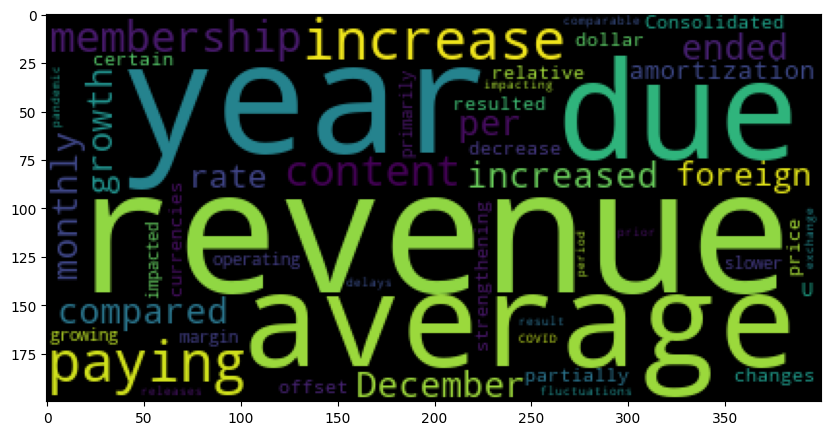

In [16]:
cloud = WordCloud(max_words=50, stopwords=stopwords.words("english")).generate(prompt)
plt.figure(figsize=(10, 10))
plt.imshow(cloud)

### Chat GPT 4 

requires invitation

In [ ]:
prompt = """

Consolidated revenues for the year ended December 31, 2022 increased 6% as compared to the year ended December 31, 2021, due to
the 6% growth in average paying memberships and a 1% increase in average monthly revenue per paying membership. The increase in
average monthly revenue per paying membership resulted from our price changes, partially offset by the strengthening of the U.S. dollar relative
to certain foreign currencies.
The decrease in operating margin is primarily due to revenues growing at a slower rate as compared to the 15% increase in content
amortization. Revenue growth during the year was impacted by fluctuations in foreign exchange rates, while content amortization increased as a
result of delays in content releases due to the COVID-19 pandemic impacting the comparable prior year period

"""

In [ ]:
completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "user", "content": "Please tell me about the sentiment (positive, negative, neutral) of this information for the market (Netflix company): " + prompt}
  ]
)

print(completion.choices[0].message.content)